### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.3.0'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/dataset/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1098 images belonging to 10 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/dataset/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 280 images belonging to 10 classes.


In [6]:
training_set.class_indices

{'n0': 0,
 'n1': 1,
 'n2': 2,
 'n3': 3,
 'n4': 4,
 'n5': 5,
 'n6': 6,
 'n7': 7,
 'n8': 8,
 'n9': 9}

## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

### Step 3 - Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [13]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(rate=0.5))

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [17]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

### Training the CNN on the Training set and evaluating it on the Test set

In [21]:
fitted_model = cnn.fit(x = training_set,
                       steps_per_epoch = int(1098/32),
                       epochs = 25,
                       validation_data = test_set,
                       validation_steps = int(280/32))

Epoch 1/25
34/34 [==============================] - 46s 1s/step - loss: 0.9625 - accuracy: 0.6482 - val_loss: 1.0314 - val_accuracy: 0.6289
Epoch 2/25
34/34 [==============================] - 44s 1s/step - loss: 0.8989 - accuracy: 0.6904 - val_loss: 1.4274 - val_accuracy: 0.5703
Epoch 3/25
34/34 [==============================] - 44s 1s/step - loss: 0.9011 - accuracy: 0.6970 - val_loss: 1.0897 - val_accuracy: 0.6328
Epoch 4/25
34/34 [==============================] - 44s 1s/step - loss: 0.7887 - accuracy: 0.7317 - val_loss: 1.1185 - val_accuracy: 0.6484
Epoch 5/25
34/34 [==============================] - 44s 1s/step - loss: 0.7454 - accuracy: 0.7467 - val_loss: 1.0629 - val_accuracy: 0.6406
Epoch 6/25
34/34 [==============================] - 44s 1s/step - loss: 0.7260 - accuracy: 0.7505 - val_loss: 1.0228 - val_accuracy: 0.6289
Epoch 7/25
34/34 [==============================] - 44s 1s/step - loss: 0.7114 - accuracy: 0.7486 - val_loss: 0.9287 - val_accuracy: 0.6797
Epoch 8/25
34/34 [==

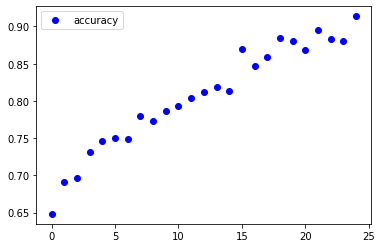

In [22]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')

plt.legend()

## Part 4 - Making a single prediction

In [29]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/My Drive/Colab Notebooks/dataset/samples/monkey_4.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
training_set.class_indices

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


{'n0': 0,
 'n1': 1,
 'n2': 2,
 'n3': 3,
 'n4': 4,
 'n5': 5,
 'n6': 6,
 'n7': 7,
 'n8': 8,
 'n9': 9}

n0, alouattapalliata  n1, erythrocebuspatas

n2, cacajaocalvus n3, macacafuscata

n4, cebuellapygmea n5, cebuscapucinus

n6, micoargentatus n7, saimirisciureus

n8, aotusnigriceps n9, trachypithecusjohnii